In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

data = pd.read_csv(r"C:\Users\david\Downloads\savant_data.csv")
df = data[["player_name", "release_pos_z", "spin_axis", "pitch_type"]]
df.dropna()

# add column converting degrees to radians
df["spin_rad"] = df["spin_axis"] * np.pi/180
df.head()

<ipython-input-6-dbe3ddb6f1e6>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["spin_rad"] = df["spin_axis"] * np.pi/180


,player_name,release_pos_z,spin_axis,pitch_type,spin_rad
0,"Rogers, Tyler",1.28,109.0,SL,1.902409
1,"Rogers, Tyler",1.20,326.0,FF,5.689773
2,"Rogers, Tyler",1.30,128.0,SL,2.234021
3,"Rogers, Tyler",1.27,325.0,FF,5.672320
4,"Rogers, Tyler",1.23,324.0,FF,5.654867


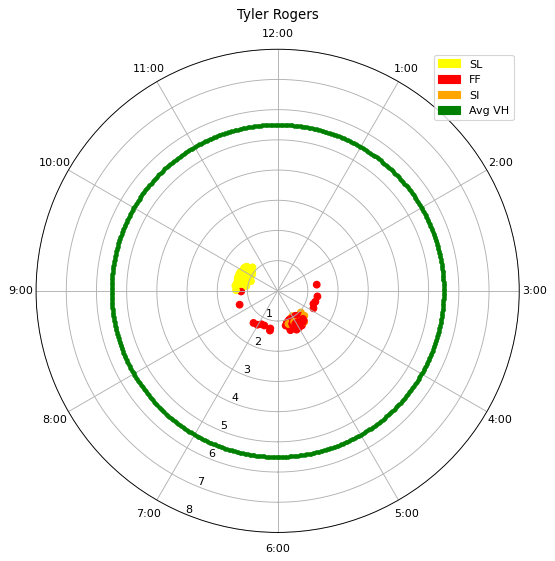

In [9]:
# need unique pitch types for coloring
# print(df["pitch_type"].unique())
colors = {"SL":"yellow", "FF": "red", "SI":"orange"}

fig = plt.figure(figsize=(8, 8), dpi=80)
ax = fig.add_subplot(111, projection = "polar")
pic = ax.scatter(df["spin_rad"], df["release_pos_z"], c = df["pitch_type"].map(colors), cmap = "hsv", alpha = 1)

# vertical release height average mlb
r = 5.5

rads = np.arange(0, (2 * np.pi), 0.01)
for rad in rads:
    plt.polar(rad, r, 'g.')

plt.title("Tyler Rogers")
ax.set_rmax(8)

ax.set_theta_direction(-1)
ax.set_theta_zero_location("S")

#Set the circumference ticks
ax.set_xticks(np.linspace(0, 2*np.pi, 12, endpoint=False))

# set the label names
ticks = ["6:00", "7:00", "8:00", "9:00", "10:00", "11:00", "12:00", "1:00", "2:00", "3:00", "4:00", "5:00"]
ax.set_xticklabels(ticks)

# Creating Legend
yellow_patch = mpatches.Patch(color='yellow', label='SL')
red_patch = mpatches.Patch(color='red', label='FF')
orange_patch = mpatches.Patch(color='orange', label='SI')
green_patch = mpatches.Patch(color='green', label='Avg VH')

plt.legend(handles=[yellow_patch, red_patch, orange_patch, green_patch])

plt.show()


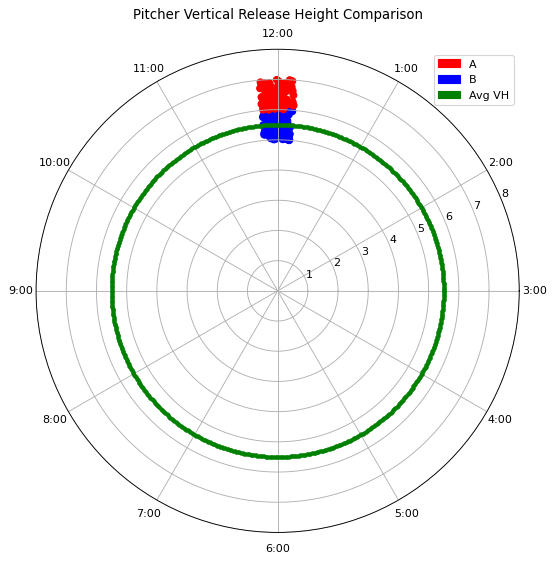

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(5)

# pitcher A low release

dfA = {'rel_height': np.random.uniform(low = 5, high = 6, size = 100),
       'spin_deg': np.random.uniform(low = 85, high = 95, size = 100),
      'name': "a"}
dfA = pd.DataFrame(dfA)

# pitcher B high release

dfB = {'rel_height': np.random.uniform(low = 6, high = 7, size = 100),
       'spin_deg': np.random.uniform(low = 85, high = 95, size = 100),
      'name': "b"}
dfB = pd.DataFrame(dfB)

df = pd.concat([dfA,dfB])

df["spin_rad"] = df["spin_deg"] * np.pi/180

colors = {"a": "blue", "b": "red"}

fig = plt.figure(figsize=(8, 8), dpi=80)
ax = fig.add_subplot(111, projection = "polar")
pic = ax.scatter(df["spin_rad"], df["rel_height"], c = df["name"].map(colors))

# set line for league average vertical release height
r = 5.5

rads = np.arange(0, (2 * np.pi), 0.01)
for rad in rads:
    plt.polar(rad, r, 'g.')

plt.title("Pitcher Vertical Release Height Comparison")
ax.set_rmax(8)

ax.set_theta_direction(1)
ax.set_theta_offset(2*np.pi)

#Set the circumference ticks
ax.set_xticks(np.linspace(0, 2*np.pi, 12, endpoint=False))

# set the label names
ticks = ['3:00', '2:00', '1:00', '12:00', '11:00','10:00','9:00','8:00','7:00', '6:00', '5:00', '4:00']
ax.set_xticklabels(ticks)

# Creating Legend
blue_patch = mpatches.Patch(color='blue', label='B')
red_patch = mpatches.Patch(color='red', label='A')
green_patch = mpatches.Patch(color='green', label='Avg VH')

plt.legend(handles=[red_patch, blue_patch, green_patch])


plt.show()